#### We'll use some commands to import the kaggle dataset directly into our notebook. The first 2 commands are necessary.

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


* At first, go to your kaggle account and download new api token by generating new.
* Then upload the file into the notebook.
* Then you go to the required dataset page and click on copy api command from three dots.

This is the command pasted below as you see

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:48<00:00, 23.3MB/s]
100% 1.06G/1.06G [00:48<00:00, 23.4MB/s]


We get the dataset in zip format. Let's unzip it.

In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [16]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [5]:
# generators ---> when dataset in large, work on one batch at a time.
# Otherwise RAM overload
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int', # cats = 0 and dogs = 1
    batch_size = 32,
    image_size = (256, 256) # all our images become of shape (256 x 256 x 3)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int', # cats = 0 and dogs = 1
    batch_size = 32,
    image_size = (256, 256) # all our images become of shape (256 x 256 x 3)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
# Normalize the values
# So, we will make each pixel value fall within 0-1. initially integer now float
def process(image, label):
  image = tf.cast(image/255. ,tf.float32)
  return image, label

# So, we'll go through each image in each dataset.
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [7]:
model = Sequential()

model.add(Conv2D(32, kernel_size = (3, 3), padding = 'valid' ,activation = 'relu', input_shape = (256, 256, 3)))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(64, kernel_size = (3, 3), padding = 'valid' ,activation = 'relu', input_shape = (256, 256, 3)))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(128, kernel_size = (3, 3), padding = 'valid' ,activation = 'relu', input_shape = (256, 256, 3)))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [9]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [10]:
history = model.fit(train_ds, epochs=10, validation_data = validation_ds)

Epoch 1/10
625/625 [==============================] - 81s 117ms/step - loss: 0.6504 - accuracy: 0.6090 - val_loss: 0.5873 - val_accuracy: 0.6960
Epoch 2/10
625/625 [==============================] - 53s 84ms/step - loss: 0.5117 - accuracy: 0.7421 - val_loss: 0.4689 - val_accuracy: 0.7776
Epoch 3/10
625/625 [==============================] - 53s 85ms/step - loss: 0.4078 - accuracy: 0.8134 - val_loss: 0.4523 - val_accuracy: 0.7860
Epoch 4/10
625/625 [==============================] - 53s 85ms/step - loss: 0.2886 - accuracy: 0.8733 - val_loss: 0.6013 - val_accuracy: 0.7782
Epoch 5/10
625/625 [==============================] - 53s 84ms/step - loss: 0.1694 - accuracy: 0.9331 - val_loss: 0.7245 - val_accuracy: 0.7840
Epoch 6/10
625/625 [==============================] - 55s 87ms/step - loss: 0.0932 - accuracy: 0.9646 - val_loss: 0.9233 - val_accuracy: 0.7560
Epoch 7/10
625/625 [==============================] - 51s 81ms/step - loss: 0.0664 - accuracy: 0.9779 - val_loss: 0.9908 - val_accuracy

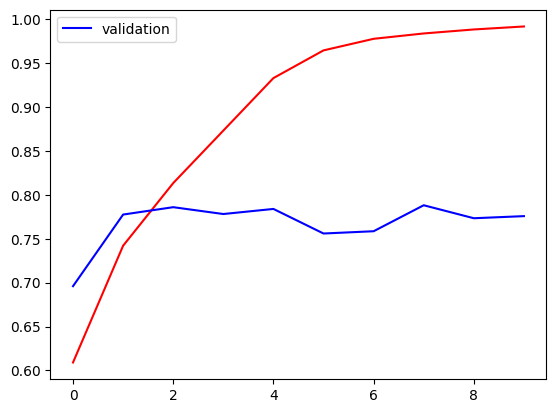

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color = 'red')
plt.plot(history.history['val_accuracy'], color = 'blue', label='validation')
plt.legend()
plt.show()

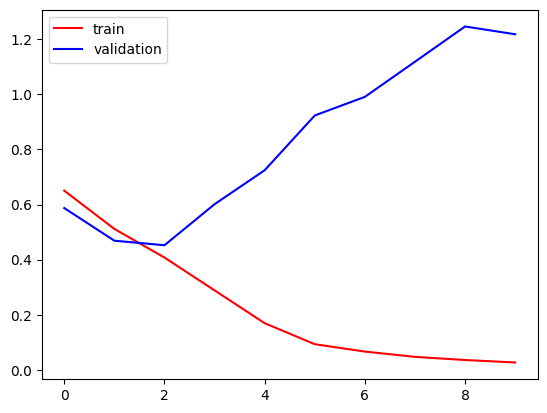

In [14]:
plt.plot(history.history['loss'], color = 'red', label = 'train')
plt.plot(history.history['val_loss'], color = 'blue', label='validation')
plt.legend()
plt.show()

### Overfitting Seen
When we look at the graph, we see that the model is doing too well in the training set but not so well on the validation set or with new data. It is not generalising well. It has overfitted.

Let's tackle it by some other techniques like using dropouts and stuff.

In [15]:
# Ways to reduce overfitting

# Add more data
# Data Augmentation
# L1/L2 Regularizer
# Dropout
# Batch Normalization
# Reduce Complexity

In [17]:
model2 = Sequential()

model2.add(Conv2D(32, kernel_size = (3, 3), padding = 'valid' ,activation = 'relu', input_shape = (256, 256, 3)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model2.add(Conv2D(64, kernel_size = (3, 3), padding = 'valid' ,activation = 'relu', input_shape = (256, 256, 3)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model2.add(Conv2D(128, kernel_size = (3, 3), padding = 'valid' ,activation = 'relu', input_shape = (256, 256, 3)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model2.add(Flatten())

model2.add(Dense(128, activation = 'relu'))
model2.add(Dropout(0.1))
model2.add(Dense(64, activation = 'relu'))
model2.add(Dropout(0.1))
model2.add(Dense(1, activation = 'sigmoid'))


In [18]:
model2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [19]:
history2 = model2.fit(train_ds, epochs=10, validation_data = validation_ds)

Epoch 1/10
625/625 [==============================] - 74s 108ms/step - loss: 1.0412 - accuracy: 0.6044 - val_loss: 0.5845 - val_accuracy: 0.6980
Epoch 2/10
625/625 [==============================] - 68s 109ms/step - loss: 0.5628 - accuracy: 0.7109 - val_loss: 0.5546 - val_accuracy: 0.7186
Epoch 3/10
625/625 [==============================] - 65s 104ms/step - loss: 0.4878 - accuracy: 0.7693 - val_loss: 0.5988 - val_accuracy: 0.6822
Epoch 4/10
625/625 [==============================] - 65s 103ms/step - loss: 0.4168 - accuracy: 0.8120 - val_loss: 0.5411 - val_accuracy: 0.7476
Epoch 5/10
625/625 [==============================] - 65s 104ms/step - loss: 0.3464 - accuracy: 0.8472 - val_loss: 0.4239 - val_accuracy: 0.8088
Epoch 6/10
625/625 [==============================] - 67s 107ms/step - loss: 0.2695 - accuracy: 0.8848 - val_loss: 0.5324 - val_accuracy: 0.7670
Epoch 7/10
625/625 [==============================] - 67s 107ms/step - loss: 0.1830 - accuracy: 0.9265 - val_loss: 0.5572 - val_ac

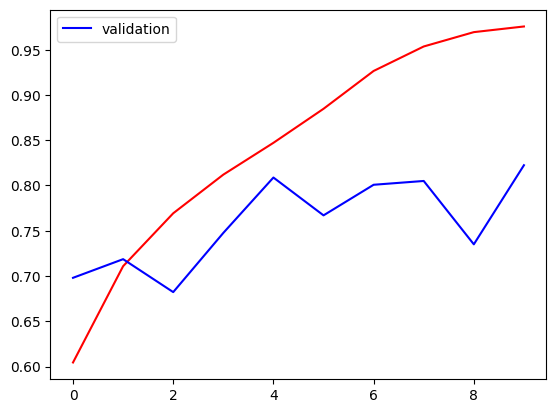

In [20]:
plt.plot(history2.history['accuracy'], color = 'red')
plt.plot(history2.history['val_accuracy'], color = 'blue', label='validation')
plt.legend()
plt.show()

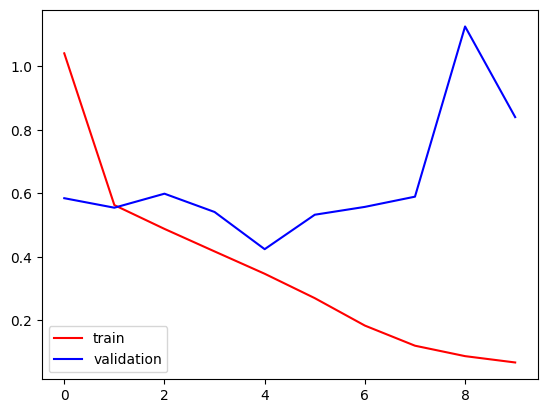

In [22]:
plt.plot(history2.history['loss'], color = 'red', label = 'train')
plt.plot(history2.history['val_loss'], color = 'blue', label='validation')
plt.legend()
plt.show()